# Sample Experiments
Model: Deep AR

Dataset: Electricity

This notebooks looks at the potential for specific random seeds to produce bad results when sampling from different models. The differences, in terms of evaluation metrics, between samples from the same architecture trained from different random seeds are calculated. Then we look for specific random seeds that produce bad model performance across the architecture.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.metrics import *

In [2]:
experiment_path = "/home/dev/deepts/experiments/deep_ar/electricity/"
exp = load_data(experiment_path + "5A")
exp[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,125.224040,215.796051,235.0,9.791667,8.031874,1.119477,2.436831,0.686689,NaN,16.191738,133.960422,0.541667,215.796054,0.916667,79.634643,1.000000
1,1.0,48.990621,136.730927,2499.0,104.125000,9.577165,0.594865,0.054052,0.056183,NaN,2.971056,84.231349,0.000000,136.730919,0.125000,36.001605,0.875000
2,2.0,0.376830,12.037855,190.0,7.916667,8.673073,0.057832,0.062169,0.065225,NaN,0.331905,8.978005,0.000000,12.037856,0.041667,4.839435,1.000000
3,3.0,3365.971354,1190.214111,10468.0,436.166667,48.398763,1.024660,0.111620,0.119741,NaN,15.295197,417.006152,0.000000,1190.214157,0.000000,735.222949,0.375000
4,4.0,546.772298,448.277496,4087.0,170.291667,25.383302,0.735847,0.101973,0.109148,NaN,10.820999,174.634157,0.000000,448.277496,0.041667,278.383728,0.583333


In [3]:
metric_list_exp = ["MAPE"]

In [4]:
exp_array = calculate_timeseries_means(exp, metric_list_exp, 321)
exp_array.shape

(100, 321, 1)

### First we want to find the best, worst and average seeds for the architecture

In [5]:
top_n = 10

(array([  0.,   3.,   0.,   9.,   3.,  34.,  11.,   1.,   1.,   6.,  22.,
        199.,   4.,  21.,   0.,  82.,   6., 229.,  30.,   2.,   1.,   0.,
          1.,   0.,   2.,   0.,   8.,   3.,   1.,   3.,   1.,  53.,   1.,
          2.,   8.,   8.,   4.,   0.,  18.,   0.,  30.,   1.,   2., 205.,
          0.,   1.,   1.,   2., 279.,   0.,   0.,   2.,   1.,   7.,   8.,
          1.,  45.,   0.,  15.,   0.,   6.,   0.,   1.,   2., 217.,   4.,
          1.,   8., 122.,   2.,   3.,   8.,   2.,   0.,  11., 306.,   2.,
          0.,   1.,  23.,   6.,   5.,   1.,   0., 152.,   0.,   0.,   0.,
        170.,   1., 250.,   0.,   0., 186.,   5.,   7.,   0., 307.,   7.,
         17.]),
 array([97, 75, 48, 90, 17]))

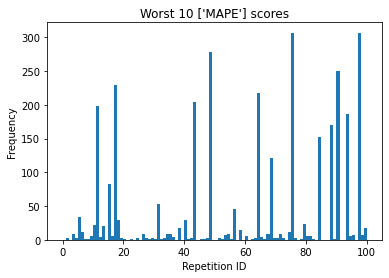

In [6]:
indexes_worst, exp_10_worst = np.unique(np.argsort(exp_array, axis=0)[-top_n:], return_counts=True)
exp_10_worst_count = count_repetitions_among_top_n(indexes_worst, exp_10_worst, 100)

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_10_worst_count)
plt.title(f"Worst 10 {metric_list_exp} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_10_worst_count, np.argsort(exp_10_worst_count)[-5:][::-1]

(array([ 11.,  45.,   7.,  47.,  49.,  11.,  16.,  99., 116.,  10.,   6.,
          4.,   8.,   6.,  11.,   6.,  11.,   3.,   9.,   8.,   9.,  41.,
         31.,  32.,   6.,  59.,  29.,  39.,  39.,  33., 146.,  11., 125.,
          6.,   9.,   1.,  65., 139.,  16.,  16.,   2.,  75.,  51.,   2.,
         65.,  27.,   9.,  66.,   1.,   4.,  25.,  13.,  77.,  18.,   7.,
         17.,   5.,  51.,  24.,  40.,  32., 110.,  75.,  21.,   3.,  31.,
          5.,  11.,   5.,  13.,   8.,   6.,  58.,  27.,  15.,   0.,   8.,
         70.,  22.,   5.,   8.,  28.,  96.,  75.,   4.,  39., 136.,  60.,
          4.,  34.,   2.,  37.,  66.,   5.,  15.,   6., 134.,   5.,   9.,
          8.]),
 'highest indexes: [30 37 86 96 32]')

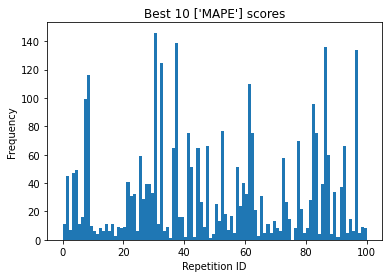

In [7]:
indexes_best, exp_10_best = np.unique(np.argsort(exp_array, axis=0)[:top_n], return_counts=True)
exp_10_best_count = count_repetitions_among_top_n(indexes_best, exp_10_best, 100)

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_10_best_count)
plt.title(f"Best 10 {metric_list_exp} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_10_best_count, f"highest indexes: {np.argsort(exp_10_best_count)[-5:][::-1]}"

(array([80., 43., 72., 34., 35., 30., 30., 10., 13.,  9.,  8., 12., 33.,
         7., 58.,  4., 54.,  3., 20., 65., 69., 49., 39., 53., 53., 22.,
        44., 32., 40., 37., 21., 21., 14., 65., 41., 11., 35.,  4., 25.,
        64., 26., 27., 26.,  6., 31., 37., 62., 42.,  2., 20., 67., 49.,
        28., 41., 37., 43., 17., 29., 30., 48., 40., 21., 21., 47.,  6.,
        37., 80., 57.,  8., 37., 67., 51., 20., 28., 66.,  2., 51., 27.,
        16., 21., 41., 33., 17., 17.,  9., 31., 14., 36.,  7., 59.,  4.,
        62., 24.,  6., 24., 11., 18.,  1., 39., 27.]),
 'highest indexes: [ 0 66  2 20 50]')

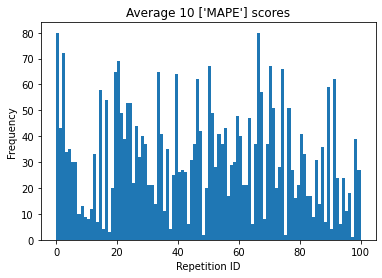

In [8]:
indexes_middle, exp_10_middle = np.unique(np.argsort(exp_array, axis=0)[45:55], return_counts=True)
exp_10_middle_count = count_repetitions_among_top_n(indexes_middle, exp_10_middle, 100)

plt.hist([i for i in range(100)], bins=100, range=(0, 100), weights=exp_10_middle_count)
plt.title(f"Average 10 {metric_list_exp} scores")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

exp_10_middle_count, f"highest indexes: {np.argsort(exp_10_middle_count)[-5:][::-1]}"

So we can see that the repetition that used seed 30 is the best one, seed 97 is the worst one and seed 0 is the most average one. What happens when we train models using these seeds and then sample from them multiple times with different random seeds?

## Is it possible that some seeds produce good or bad groups of samples, making the score of the model worse than it actually is?


### Differences in terms of error metrics

In [9]:
path97 = "/home/dev/deepts/experiments/deep_ar/electricity/5A/repetition97"

In [10]:
samples97 = []
for f in os.listdir(path97 + "/samples"):
    if f.endswith("metrics.csv"):
        samples97.append(pd.read_csv(f"{path97}/samples/{f}", index_col=0).rename_axis("index"))

samples97[0].head()


,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,130.156779,223.296280,235.0,9.791667,8.031874,1.158386,2.147498,0.855072,NaN,16.681895,80.897702,0.166667,223.296289,0.666667,152.002092,0.791667
1,1.0,912.242269,712.255981,2499.0,104.125000,9.577165,3.098760,0.289437,0.339965,NaN,67.899370,210.521396,0.000000,712.255981,0.000000,671.732089,0.000000
2,2.0,8.716516,68.317848,190.0,7.916667,8.673073,0.328209,0.360651,0.444142,NaN,6.033374,22.133972,0.000000,68.317847,0.000000,52.877369,0.041667
3,3.0,16567.427083,3003.849609,10468.0,436.166667,48.398763,2.586025,0.297780,0.354343,NaN,65.130797,833.321445,0.000000,3003.849792,0.000000,3299.763599,0.041667
4,4.0,2735.172526,1214.082275,4087.0,170.291667,25.383302,1.992915,0.302347,0.358573,NaN,50.676386,343.763737,0.000000,1214.082275,0.000000,1345.532080,0.000000


We also add the score from the original test of the model so we can see how that compares to the new tests.

In [11]:
samples97.append(pd.read_csv(f"{path97}/metrics.csv", index_col=0).rename_axis("index"))
len(samples97)

101

In [12]:
report_experiment_results(samples97)

Most occuring repetitions worst 10 (repetition, frequency): {91: 2, 51: 2, 92: 2, 99: 2, 24: 2, 97: 2, 41: 1, 36: 1, 23: 1, 20: 1, 72: 1, 48: 1, 21: 1, 44: 1, 58: 1, 30: 1, 78: 1, 10: 1, 81: 1, 71: 1, 62: 1, 87: 1, 18: 1, 17: 1}
Most occuring repetitions best 10 (repetition, frequency): {29: 3, 42: 2, 60: 2, 0: 1, 76: 1, 17: 1, 65: 1, 80: 1, 30: 1, 85: 1, 95: 1, 47: 1, 49: 1, 5: 1, 6: 1, 23: 1, 67: 1, 26: 1, 52: 1, 63: 1, 22: 1, 14: 1, 94: 1, 90: 1, 39: 1, 19: 1}
Total number of different repetitions present across metrics (highest): 24
Total number of different repetitions present across metrics (lowest): 26

(MSE) Highest value: 11277198.0
(MSE) Lowest value:  10983621.0
(MSE) Difference between highest and lowest: 293577.0
(MSE) Difference between average error, 10 highest - 10 lowest: 172045.0

(MASE) Highest value: 2.9576680660247803
(MASE) Lowest value:  2.9532742500305176
(MASE) Difference between highest and lowest error: 0.004393815994262695
(MASE) Difference between the avera

In [13]:
path30 = "/home/dev/deepts/experiments/deep_ar/electricity/5A/repetition30"

In [14]:
samples30 = []
for f in os.listdir(path30 + "/samples"):
    if f.endswith("metrics.csv"):
        samples30.append(pd.read_csv(f"{path30}/samples/{f}", index_col=0).rename_axis("index"))

samples30[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,83.303065,159.765015,235.0,9.791667,8.031874,0.828807,1.909862,0.582567,NaN,11.752283,85.592220,0.375,159.765004,0.791667,69.488710,0.916667
1,1.0,25.947169,100.194069,2499.0,104.125000,9.577165,0.435907,0.039426,0.039903,NaN,2.328052,58.974825,0.000,100.194069,0.458333,48.046631,1.000000
2,2.0,0.189471,8.866434,190.0,7.916667,8.673073,0.042596,0.047696,0.046351,NaN,0.330766,5.715729,0.000,8.866435,0.750000,8.054305,1.000000
3,3.0,1339.617432,678.390930,10468.0,436.166667,48.398763,0.584029,0.063915,0.067054,NaN,6.761845,304.798291,0.000,678.390945,0.083333,356.680939,0.625000
4,4.0,252.174886,277.429138,4087.0,170.291667,25.383302,0.455400,0.062610,0.065726,NaN,5.543349,126.813089,0.000,277.429161,0.291667,158.540425,0.750000


In [15]:
samples30.append(pd.read_csv(f"{path30}/metrics.csv", index_col=0).rename_axis("index"))
len(samples30)

101

In [16]:
report_experiment_results(samples30)

Most occuring repetitions worst 10 (repetition, frequency): {20: 2, 23: 2, 55: 2, 13: 2, 54: 1, 31: 1, 2: 1, 91: 1, 66: 1, 45: 1, 41: 1, 26: 1, 77: 1, 93: 1, 57: 1, 68: 1, 65: 1, 33: 1, 81: 1, 78: 1, 49: 1, 43: 1, 73: 1, 3: 1, 5: 1, 18: 1}
Most occuring repetitions best 10 (repetition, frequency): {76: 2, 77: 2, 1: 2, 64: 2, 85: 1, 14: 1, 42: 1, 81: 1, 29: 1, 30: 1, 80: 1, 8: 1, 11: 1, 2: 1, 12: 1, 41: 1, 75: 1, 60: 1, 46: 1, 90: 1, 91: 1, 86: 1, 69: 1, 94: 1, 39: 1, 72: 1}
Total number of different repetitions present across metrics (highest): 26
Total number of different repetitions present across metrics (lowest): 26

(MSE) Highest value: 5185065.0
(MSE) Lowest value:  5088425.0
(MSE) Difference between highest and lowest: 96640.0
(MSE) Difference between average error, 10 highest - 10 lowest: 70944.5

(MASE) Highest value: 0.7471470832824707
(MASE) Lowest value:  0.7441310286521912
(MASE) Difference between highest and lowest error: 0.003016054630279541
(MASE) Difference between th

In [17]:
path00 = "/home/dev/deepts/experiments/deep_ar/electricity/5A/repetition00"

In [18]:
samples00 = []
for f in os.listdir(path00 + "/samples"):
    if f.endswith("metrics.csv"):
        samples00.append(pd.read_csv(f"{path00}/samples/{f}", index_col=0).rename_axis("index"))

samples00[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,109.797109,213.936569,235.0,9.791667,8.031874,1.109831,2.396431,0.683031,NaN,15.965526,133.657844,0.666667,213.936567,0.916667,78.879327,1.000000
1,1.0,63.482402,159.307602,2499.0,104.125000,9.577165,0.693088,0.062985,0.065887,NaN,4.290296,88.153320,0.000000,159.307602,0.000000,44.748907,0.875000
2,2.0,0.385997,12.788115,190.0,7.916667,8.673073,0.061436,0.066191,0.069405,NaN,0.354949,9.313883,0.000000,12.788115,0.083333,4.704738,0.958333
3,3.0,3339.175781,1203.466553,10468.0,436.166667,48.398763,1.036069,0.113038,0.121201,NaN,14.679779,433.414203,0.000000,1203.466522,0.000000,705.231818,0.416667
4,4.0,550.164388,453.268951,4087.0,170.291667,25.383302,0.744041,0.102472,0.109945,NaN,10.754466,172.602370,0.000000,453.268959,0.083333,276.262827,0.541667


In [19]:
samples00.append(pd.read_csv(f"{path00}/metrics.csv", index_col=0).rename_axis("index"))
len(samples00)

101

In [20]:
report_experiment_results(samples00)

Most occuring repetitions worst 10 (repetition, frequency): {51: 2, 85: 2, 18: 2, 26: 1, 100: 1, 23: 1, 41: 1, 20: 1, 21: 1, 15: 1, 16: 1, 36: 1, 54: 1, 78: 1, 99: 1, 57: 1, 68: 1, 25: 1, 87: 1, 97: 1, 73: 1, 13: 1, 32: 1, 74: 1, 81: 1, 96: 1, 55: 1}
Most occuring repetitions best 10 (repetition, frequency): {29: 3, 39: 2, 64: 2, 0: 1, 32: 1, 65: 1, 11: 1, 70: 1, 60: 1, 80: 1, 8: 1, 40: 1, 90: 1, 38: 1, 46: 1, 47: 1, 6: 1, 42: 1, 34: 1, 98: 1, 1: 1, 84: 1, 94: 1, 17: 1, 77: 1, 72: 1}
Total number of different repetitions present across metrics (highest): 27
Total number of different repetitions present across metrics (lowest): 26

(MSE) Highest value: 4676023.0
(MSE) Lowest value:  4505617.5
(MSE) Difference between highest and lowest: 170405.5
(MSE) Difference between average error, 10 highest - 10 lowest: 116910.0

(MASE) Highest value: 0.9300065636634827
(MASE) Lowest value:  0.9273675680160522
(MASE) Difference between highest and lowest error: 0.00263899564743042
(MASE) Difference

In [21]:
path37 = "/home/dev/deepts/experiments/deep_ar/electricity/5A/repetition37"

In [22]:
samples37 = []
for f in os.listdir(path37 + "/samples"):
    if f.endswith("metrics.csv"):
        samples37.append(pd.read_csv(f"{path37}/samples/{f}", index_col=0).rename_axis("index"))

samples37[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,150.502228,262.031891,235.0,9.791667,8.031874,1.359333,2.515031,0.792475,NaN,28.641722,239.220366,0.75,262.031881,0.875000,84.973180,0.958333
1,1.0,34.551531,110.326546,2499.0,104.125000,9.577165,0.479990,0.044123,0.045664,NaN,3.162346,66.585166,0.00,110.326546,0.250000,42.324486,0.875000
2,2.0,0.129400,5.655134,190.0,7.916667,8.673073,0.027168,0.029839,0.030205,NaN,0.245394,5.543524,0.00,5.655134,0.375000,4.672409,1.000000
3,3.0,2050.637858,900.648926,10468.0,436.166667,48.398763,0.775372,0.086392,0.091755,NaN,10.378622,352.487018,0.00,900.648911,0.041667,520.183057,0.541667
4,4.0,317.847432,333.752136,4087.0,170.291667,25.383302,0.547854,0.076055,0.080382,NaN,7.360650,136.587997,0.00,333.752129,0.125000,197.616325,0.625000


In [23]:
samples37.append(pd.read_csv(f"{path37}/metrics.csv", index_col=0).rename_axis("index"))
len(samples37)

101

In [24]:
report_experiment_results(samples37)

Most occuring repetitions worst 10 (repetition, frequency): {73: 3, 51: 2, 20: 2, 93: 2, 41: 1, 72: 1, 23: 1, 21: 1, 36: 1, 79: 1, 57: 1, 78: 1, 31: 1, 87: 1, 81: 1, 35: 1, 85: 1, 97: 1, 25: 1, 43: 1, 5: 1, 96: 1, 15: 1, 49: 1, 18: 1}
Most occuring repetitions best 10 (repetition, frequency): {80: 2, 22: 2, 1: 2, 77: 2, 64: 2, 6: 2, 49: 1, 29: 1, 14: 1, 85: 1, 42: 1, 76: 1, 8: 1, 60: 1, 47: 1, 75: 1, 90: 1, 67: 1, 46: 1, 0: 1, 52: 1, 94: 1, 72: 1, 63: 1}
Total number of different repetitions present across metrics (highest): 25
Total number of different repetitions present across metrics (lowest): 24

(MSE) Highest value: 2859086.0
(MSE) Lowest value:  2731400.0
(MSE) Difference between highest and lowest: 127686.0
(MSE) Difference between average error, 10 highest - 10 lowest: 95210.0

(MASE) Highest value: 0.7637161612510681
(MASE) Lowest value:  0.7614412903785706
(MASE) Difference between highest and lowest error: 0.0022748708724975586
(MASE) Difference between the average error, 1

In [25]:
path75 = "/home/dev/deepts/experiments/deep_ar/electricity/5A/repetition75"

In [26]:
samples75 = []
for f in os.listdir(path75 + "/samples"):
    if f.endswith("metrics.csv"):
        samples75.append(pd.read_csv(f"{path75}/samples/{f}", index_col=0).rename_axis("index"))

samples75[0].head()

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,179.155965,272.301849,235.0,9.791667,8.031874,1.412611,2.697051,0.768130,NaN,37.041371,313.184656,0.833333,272.301839,0.958333,76.740239,1.0
1,1.0,525.341227,513.973328,2499.0,104.125000,9.577165,2.236106,0.209188,0.186785,NaN,23.677325,214.219940,0.708333,513.973335,1.000000,185.327434,1.0
2,2.0,2.032954,33.037621,190.0,7.916667,8.673073,0.158717,0.176081,0.160140,NaN,0.553550,4.583427,0.041667,33.037621,1.000000,17.063640,1.0
3,3.0,5889.445312,1645.481201,10468.0,436.166667,48.398763,1.416601,0.162617,0.148398,NaN,15.868445,738.002692,0.583333,1645.481201,1.000000,638.831885,1.0
4,4.0,1182.911947,787.013794,4087.0,170.291667,25.383302,1.291882,0.208134,0.185226,NaN,15.934628,403.693263,0.666667,787.013794,0.958333,285.879257,1.0


In [27]:
samples75.append(pd.read_csv(f"{path75}/metrics.csv", index_col=0).rename_axis("index"))
len(samples75)

101

In [28]:
report_experiment_results(samples75)

Most occuring repetitions worst 10 (repetition, frequency): {36: 2, 49: 2, 23: 2, 47: 2, 29: 2, 28: 1, 45: 1, 59: 1, 31: 1, 52: 1, 77: 1, 24: 1, 61: 1, 41: 1, 89: 1, 1: 1, 55: 1, 6: 1, 16: 1, 90: 1, 2: 1, 5: 1, 15: 1, 13: 1, 73: 1}
Most occuring repetitions best 10 (repetition, frequency): {0: 2, 87: 2, 81: 2, 91: 2, 70: 2, 99: 2, 10: 2, 78: 2, 85: 1, 86: 1, 13: 1, 4: 1, 11: 1, 69: 1, 14: 1, 60: 1, 62: 1, 30: 1, 22: 1, 37: 1, 57: 1, 50: 1}
Total number of different repetitions present across metrics (highest): 25
Total number of different repetitions present across metrics (lowest): 22

(MSE) Highest value: 2612373.25
(MSE) Lowest value:  2458394.25
(MSE) Difference between highest and lowest: 153979.0
(MSE) Difference between average error, 10 highest - 10 lowest: 90100.5

(MASE) Highest value: 2.394345998764038
(MASE) Lowest value:  2.3883183002471924
(MASE) Difference between highest and lowest error: 0.006027698516845703
(MASE) Difference between the average error, 10 highest - 10 

In [29]:
metric_list_seeds = ["MSE"]

In [30]:
array97 = calculate_timeseries_means(samples97, metric_list_seeds, 321)
array97.shape

(101, 321, 1)

(array([30., 21., 25., 33., 34., 24., 24., 40., 34., 27., 34., 30., 40.,
        29., 42., 27., 23., 46., 36., 25., 27., 39., 35., 31., 33., 34.,
        22., 28., 26., 29., 33., 37., 32., 33., 32., 29., 42., 38., 33.,
        32., 35., 29., 34., 33., 21., 28., 28., 36., 28., 23., 28., 23.,
        38., 30., 39., 29., 25., 29., 41., 31., 27., 24., 34., 35., 25.,
        35., 35., 29., 38., 31., 41., 32., 34., 44., 32., 31., 32., 35.,
        39., 25., 28., 40., 36., 33., 27., 30., 29., 26., 25., 19., 26.,
        43., 35., 38., 29., 24., 42., 44., 32., 30., 39.]),
 'highest indexes: [17 97 73 91 96]',
 'lowest indexes: [89 44  1 26 49]')

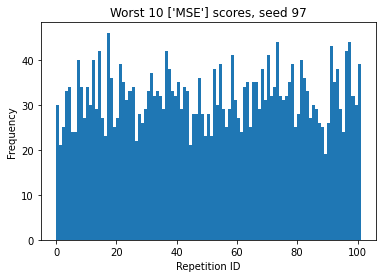

In [31]:
array97_indexes_worst, array97_10_worst = np.unique(np.argsort(array97, axis=0)[-top_n:], return_counts=True)
array97_10_worst_count = count_repetitions_among_top_n(array97_indexes_worst, array97_10_worst, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array97_10_worst_count)
plt.title(f"Worst 10 {metric_list_seeds} scores, seed 97")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array97_10_worst_count, f"highest indexes: {np.argsort(array97_10_worst_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array97_10_worst_count)[:5]}" 


(array([30., 32., 30., 34., 33., 36., 43., 26., 33., 45., 28., 42., 43.,
        35., 28., 33., 25., 34., 31., 39., 24., 31., 31., 33., 19., 36.,
        29., 26., 30., 38., 26., 29., 31., 30., 32., 30., 32., 40., 38.,
        37., 35., 30., 35., 33., 28., 28., 31., 39., 36., 33., 30., 27.,
        32., 34., 40., 32., 23., 31., 27., 27., 40., 37., 33., 32., 26.,
        27., 30., 38., 33., 36., 25., 31., 30., 27., 28., 28., 40., 29.,
        22., 34., 35., 23., 37., 31., 35., 25., 27., 27., 36., 29., 31.,
        29., 30., 29., 35., 34., 40., 32., 32., 29., 25.]),
 'highest indexes: [ 9 12  6 11 60]',
 'lowest indexes: [24 78 56 81 20]')

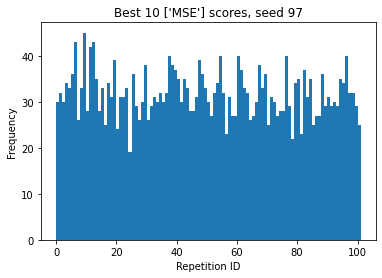

In [32]:
array97_indexes_best, array97_10_best = np.unique(np.argsort(array97, axis=0)[:top_n], return_counts=True)
array97_10_best_count = count_repetitions_among_top_n(array97_indexes_best, array97_10_best, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array97_10_best_count)
plt.title(f"Best 10 {metric_list_seeds} scores, seed 97")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array97_10_best_count, f"highest indexes: {np.argsort(array97_10_best_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array97_10_best_count)[:5]}"

In [33]:
array30 = calculate_timeseries_means(samples30, metric_list_seeds, 321)
array30.shape

(101, 321, 1)

(array([33., 25., 30., 31., 38., 37., 29., 28., 39., 41., 30., 27., 23.,
        34., 36., 36., 30., 23., 31., 34., 30., 41., 36., 26., 26., 36.,
        35., 35., 27., 26., 32., 36., 28., 24., 21., 27., 28., 28., 33.,
        26., 35., 25., 36., 30., 28., 31., 31., 42., 25., 33., 31., 35.,
        33., 25., 36., 29., 29., 46., 36., 40., 31., 31., 24., 35., 29.,
        35., 31., 38., 33., 42., 40., 36., 28., 36., 34., 29., 32., 37.,
        37., 34., 30., 33., 30., 34., 33., 38., 30., 30., 29., 28., 19.,
        34., 38., 31., 27., 26., 27., 34., 25., 37., 33.]),
 'highest indexes: [57 47 69  9 21]',
 'lowest indexes: [90 34 12 17 62]')

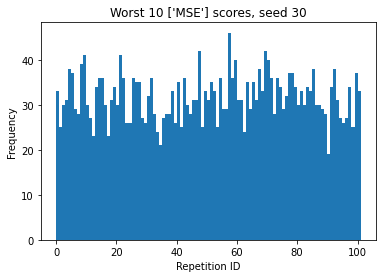

In [34]:
array30_indexes_worst, array30_10_worst = np.unique(np.argsort(array30, axis=0)[-top_n:], return_counts=True)
array30_10_worst_count = count_repetitions_among_top_n(array30_indexes_worst, array30_10_worst, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array30_10_worst_count)
plt.title(f"Worst 10 {metric_list_seeds} scores, seed 30")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array30_10_worst_count, f"highest indexes: {np.argsort(array30_10_worst_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array30_10_worst_count)[:5]}" 


(array([38., 25., 39., 38., 26., 28., 30., 27., 35., 32., 33., 34., 32.,
        26., 29., 30., 25., 27., 27., 37., 35., 34., 33., 32., 27., 33.,
        26., 34., 37., 36., 37., 20., 32., 36., 23., 27., 38., 36., 34.,
        35., 40., 35., 31., 28., 35., 25., 34., 34., 35., 40., 44., 25.,
        27., 27., 40., 24., 26., 38., 25., 25., 39., 27., 39., 22., 41.,
        24., 27., 25., 23., 29., 23., 31., 34., 24., 35., 39., 38., 34.,
        34., 42., 36., 29., 29., 33., 39., 34., 33., 39., 37., 30., 34.,
        36., 26., 30., 32., 32., 23., 30., 31., 31., 35.]),
 'highest indexes: [50 79 64 40 49]',
 'lowest indexes: [31 63 68 70 96]')

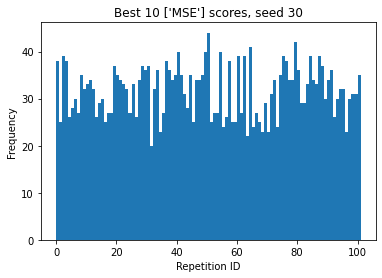

In [35]:
array30_indexes_best, array30_10_best = np.unique(np.argsort(array30, axis=0)[:top_n], return_counts=True)
array30_10_best_count = count_repetitions_among_top_n(array30_indexes_best, array30_10_best, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array30_10_best_count)
plt.title(f"Best 10 {metric_list_seeds} scores, seed 30")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array30_10_best_count, f"highest indexes: {np.argsort(array30_10_best_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array30_10_best_count)[:5]}"

In [36]:
array00 = calculate_timeseries_means(samples00, metric_list_seeds, 321)
array00.shape

(101, 321, 1)

(array([32., 23., 36., 26., 29., 34., 29., 33., 26., 36., 24., 39., 29.,
        33., 37., 29., 33., 35., 30., 27., 28., 38., 40., 24., 28., 36.,
        29., 30., 28., 25., 28., 33., 32., 37., 32., 31., 26., 32., 40.,
        23., 35., 26., 32., 35., 27., 23., 36., 29., 23., 34., 38., 33.,
        29., 29., 27., 32., 39., 45., 41., 33., 34., 28., 37., 36., 24.,
        37., 29., 24., 29., 33., 39., 32., 29., 48., 38., 28., 32., 25.,
        35., 29., 34., 37., 32., 29., 33., 34., 26., 32., 39., 32., 24.,
        36., 29., 34., 32., 31., 32., 36., 29., 37., 30.]),
 'highest indexes: [73 57 58 38 22]',
 'lowest indexes: [ 1 48 45 39 23]')

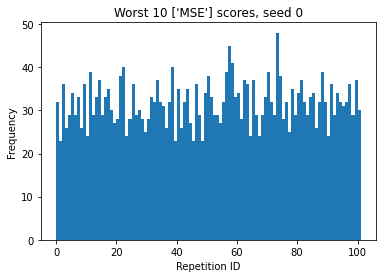

In [37]:
array00_indexes_worst, array00_10_worst = np.unique(np.argsort(array00, axis=0)[-top_n:], return_counts=True)
array00_10_worst_count = count_repetitions_among_top_n(array00_indexes_worst, array00_10_worst, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array00_10_worst_count)
plt.title(f"Worst 10 {metric_list_seeds} scores, seed 0")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array00_10_worst_count, f"highest indexes: {np.argsort(array00_10_worst_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array00_10_worst_count)[:5]}" 


(array([40., 33., 35., 29., 24., 34., 31., 20., 40., 34., 28., 32., 45.,
        26., 30., 31., 29., 26., 28., 38., 37., 42., 23., 36., 28., 29.,
        31., 35., 34., 38., 27., 26., 24., 32., 34., 34., 30., 33., 40.,
        28., 29., 36., 27., 27., 29., 31., 36., 31., 30., 38., 37., 20.,
        31., 25., 37., 30., 33., 23., 29., 28., 42., 31., 25., 26., 38.,
        28., 26., 23., 27., 39., 26., 27., 33., 27., 27., 35., 29., 34.,
        26., 51., 37., 34., 30., 43., 30., 35., 28., 36., 41., 30., 35.,
        29., 33., 39., 33., 29., 30., 37., 42., 33., 25.]),
 'highest indexes: [79 12 83 21 98]',
 'lowest indexes: [51  7 57 22 67]')

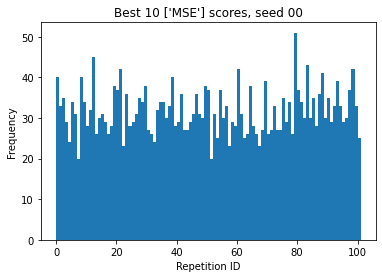

In [38]:
array00_indexes_best, array00_10_best = np.unique(np.argsort(array00, axis=0)[:top_n], return_counts=True)
array00_10_best_count = count_repetitions_among_top_n(array00_indexes_best, array00_10_best, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array00_10_best_count)
plt.title(f"Best 10 {metric_list_seeds} scores, seed 0")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array00_10_best_count, f"highest indexes: {np.argsort(array00_10_best_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array00_10_best_count)[:5]}"

In [39]:
array37 = calculate_timeseries_means(samples37, metric_list_seeds, 321)
array37.shape

(101, 321, 1)

(array([21., 30., 35., 30., 42., 28., 26., 26., 43., 33., 34., 35., 29.,
        34., 27., 32., 38., 27., 29., 25., 24., 34., 30., 32., 30., 35.,
        34., 26., 22., 25., 36., 30., 17., 26., 38., 20., 31., 28., 31.,
        23., 31., 26., 32., 28., 36., 32., 35., 37., 30., 34., 29., 33.,
        31., 24., 30., 31., 35., 38., 28., 35., 33., 32., 26., 33., 35.,
        31., 38., 35., 29., 30., 32., 28., 35., 31., 41., 33., 30., 33.,
        44., 35., 33., 32., 32., 31., 30., 39., 37., 40., 29., 33., 26.,
        36., 30., 45., 24., 32., 35., 44., 33., 40., 34.]),
 'highest indexes: [93 97 78  8  4]',
 'lowest indexes: [32 35  0 28 39]')

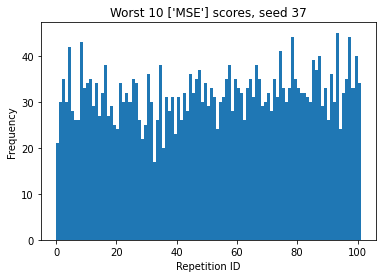

In [40]:
array37_indexes_worst, array37_10_worst = np.unique(np.argsort(array37, axis=0)[-top_n:], return_counts=True)
array37_10_worst_count = count_repetitions_among_top_n(array37_indexes_worst, array37_10_worst, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array37_10_worst_count)
plt.title(f"Worst 10 {metric_list_seeds} scores, seed 37")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array37_10_worst_count, f"highest indexes: {np.argsort(array37_10_worst_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array37_10_worst_count)[:5]}" 

(array([31., 28., 42., 32., 26., 34., 43., 30., 31., 39., 30., 27., 34.,
        32., 30., 40., 29., 24., 34., 35., 34., 35., 41., 20., 29., 33.,
        26., 28., 34., 40., 37., 30., 29., 38., 22., 31., 36., 37., 34.,
        38., 38., 36., 28., 24., 41., 33., 41., 34., 35., 31., 32., 35.,
        30., 26., 36., 28., 29., 28., 29., 20., 32., 29., 35., 26., 33.,
        29., 25., 30., 27., 35., 23., 27., 32., 23., 33., 33., 38., 31.,
        21., 42., 37., 31., 31., 31., 36., 37., 29., 39., 34., 29., 33.,
        30., 28., 28., 35., 22., 27., 40., 30., 34., 28.]),
 'highest indexes: [ 6 79  2 46 44]',
 'lowest indexes: [23 59 78 34 95]')

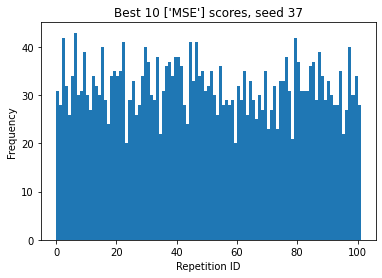

In [41]:
array37_indexes_best, array37_10_best = np.unique(np.argsort(array37, axis=0)[:top_n], return_counts=True)
array37_10_best_count = count_repetitions_among_top_n(array37_indexes_best, array37_10_best, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array37_10_best_count)
plt.title(f"Best 10 {metric_list_seeds} scores, seed 37")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array37_10_best_count, f"highest indexes: {np.argsort(array37_10_best_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array37_10_best_count)[:5]}"

In [42]:
array75 = calculate_timeseries_means(samples75, metric_list_seeds, 321)
array75.shape

(101, 321, 1)

(array([39., 29., 36., 28., 40., 34., 45., 26., 34., 34., 27., 39., 31.,
        32., 32., 34., 30., 34., 40., 36., 32., 30., 31., 28., 27., 27.,
        39., 35., 24., 36., 29., 39., 31., 29., 34., 29., 37., 33., 34.,
        29., 36., 27., 42., 31., 40., 29., 38., 34., 26., 36., 28., 24.,
        41., 27., 37., 38., 29., 30., 23., 27., 30., 31., 27., 34., 28.,
        24., 29., 33., 39., 39., 35., 27., 25., 29., 29., 34., 29., 29.,
        26., 22., 34., 32., 29., 31., 39., 26., 21., 24., 35., 31., 33.,
        28., 35., 35., 28., 40., 31., 28., 30., 32., 33.]),
 'highest indexes: [ 6 42 52  4 18]',
 'lowest indexes: [86 79 58 51 65]')

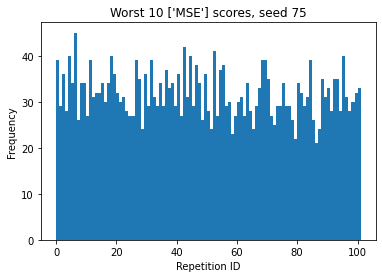

In [43]:
array75_indexes_worst, array75_10_worst = np.unique(np.argsort(array75, axis=0)[-top_n:], return_counts=True)
array75_10_worst_count = count_repetitions_among_top_n(array75_indexes_worst, array75_10_worst, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array75_10_worst_count)
plt.title(f"Worst 10 {metric_list_seeds} scores, seed 75")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array75_10_worst_count, f"highest indexes: {np.argsort(array75_10_worst_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array75_10_worst_count)[:5]}" 

(array([32., 27., 40., 37., 34., 28., 22., 37., 36., 29., 38., 41., 35.,
        34., 36., 28., 26., 37., 30., 32., 32., 32., 46., 27., 32., 37.,
        27., 29., 29., 34., 43., 30., 29., 36., 29., 25., 29., 38., 25.,
        37., 31., 30., 23., 29., 29., 33., 25., 32., 26., 29., 31., 23.,
        33., 27., 33., 30., 34., 35., 39., 31., 30., 30., 31., 27., 29.,
        28., 26., 30., 35., 27., 49., 33., 32., 40., 26., 26., 32., 38.,
        34., 27., 32., 40., 33., 28., 27., 25., 36., 28., 39., 19., 26.,
        35., 36., 28., 32., 33., 40., 36., 32., 30., 37.]),
 'highest indexes: [70 22 30 11  2]',
 'lowest indexes: [89  6 42 51 38]')

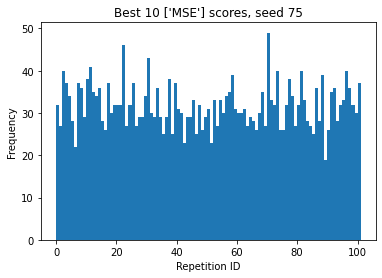

In [44]:
array75_indexes_best, array75_10_best = np.unique(np.argsort(array75, axis=0)[:top_n], return_counts=True)
array75_10_best_count = count_repetitions_among_top_n(array75_indexes_best, array75_10_best, 101)

plt.hist([i for i in range(101)], bins=101, range=(0, 101), weights=array75_10_best_count)
plt.title(f"Best 10 {metric_list_seeds} scores, seed 75")
plt.xlabel("Repetition ID")
plt.ylabel("Frequency")

array75_10_best_count, f"highest indexes: {np.argsort(array75_10_best_count)[-5:][::-1]}", f"lowest indexes: {np.argsort(array75_10_best_count)[:5]}"

These histograms indicate that certain seeds to not produce bad results when evaluating them across models. Thus it does not look like the random seed afffects the sampling from the models to the same degree as the initial seed.